In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


In [2]:
df=pd.read_csv("resume_dataset.csv")
print(df.shape)
print(df.head())


(169, 2)
       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \nMay 2013 to May 2017 B.E  ...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \n MCA   YMCAUST,  Faridabad...


In [3]:
df["Resume"]=df["Resume"].astype(str)
df["Resume"]=df["Resume"].str.lower()
df["Resume"]=df["Resume"].apply(lambda x:re.sub(r"[^a-z ]"," ",x))
df["Resume"]=df["Resume"].apply(lambda x:re.sub(r"\s+"," ",x).strip())
print(df["Resume"].head(2))

0    skills programming languages python pandas num...
1    education details may to may b e uit rgpvdata ...
Name: Resume, dtype: object


In [4]:
X=df["Resume"]
Y=df["Category"]
print(Y.value_counts())

Category
Java Developer               14
Database                     11
HR                           11
Data Science                 10
Advocate                     10
Automation Testing            7
DevOps Engineer               7
Testing                       7
DotNet Developer              7
Hadoop                        7
SAP Developer                 6
Python Developer              6
Health and fitness            6
Civil Engineer                6
Arts                          6
Business Analyst              6
Web Designing                 5
Mechanical Engineer           5
Sales                         5
ETL Developer                 5
Electrical Engineering        5
Blockchain                    5
Network Security Engineer     5
Operations Manager            4
PMO                           3
Name: count, dtype: int64


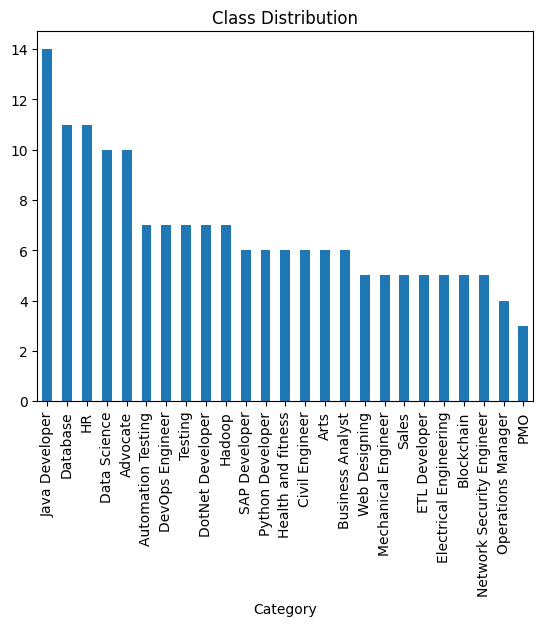

In [5]:
plt.figure()
Y.value_counts().plot(kind="bar")
plt.title("Class Distribution")
plt.show()

In [6]:
tfidf=TfidfVectorizer(stop_words="english",max_features=6000,ngram_range=(1,2))
X_vec=tfidf.fit_transform(X)
print(X_vec.shape)

(169, 6000)


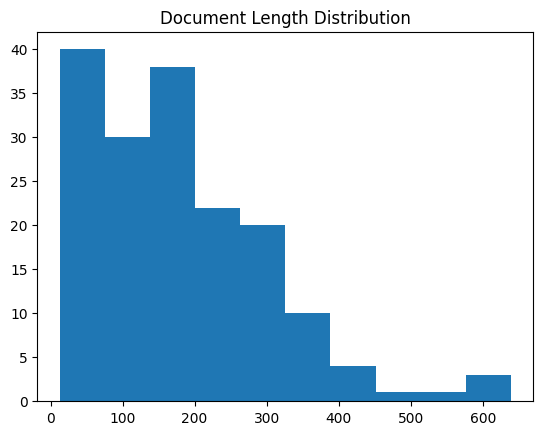

In [7]:
plt.figure()
plt.hist(X_vec.getnnz(axis=1))
plt.title("Document Length Distribution")
plt.show()


In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(
    X,Y,test_size=0.2,random_state=42,stratify=Y
)

In [9]:
models={
    "Naive Bayes":MultinomialNB(),
    "Logistic Regression":LogisticRegression(max_iter=1000),
    "Linear SVM":LinearSVC(),
    "SGD Classifier":SGDClassifier(loss="hinge",max_iter=1000,random_state=42),
    "Random Forest":RandomForestClassifier(n_estimators=300,random_state=42)
}

In [10]:
accuracies={}
cv_means={}

C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\virat\AppData\Loca

Naive Bayes Test Accuracy : 0.35294117647058826


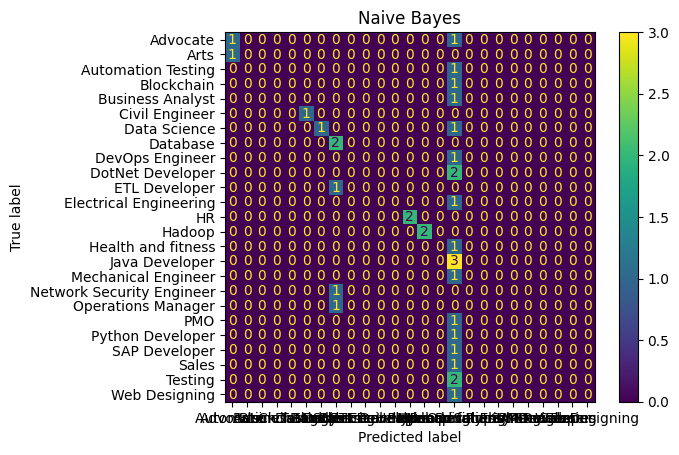

C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: User

Naive Bayes CV Scores : [0.35294118 0.35294118 0.38235294 0.29411765 0.39393939]
Naive Bayes Mean CV Accuracy : 0.35525846702317293


C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\virat\AppData\Loca

Logistic Regression Test Accuracy : 0.5


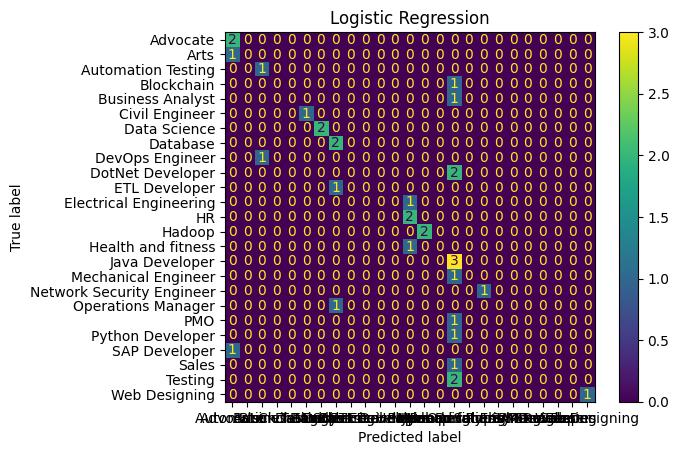

C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: User

Logistic Regression CV Scores : [0.52941176 0.55882353 0.58823529 0.52941176 0.57575758]
Logistic Regression Mean CV Accuracy : 0.5563279857397505


C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\virat\AppData\Loca

Linear SVM Test Accuracy : 0.8823529411764706


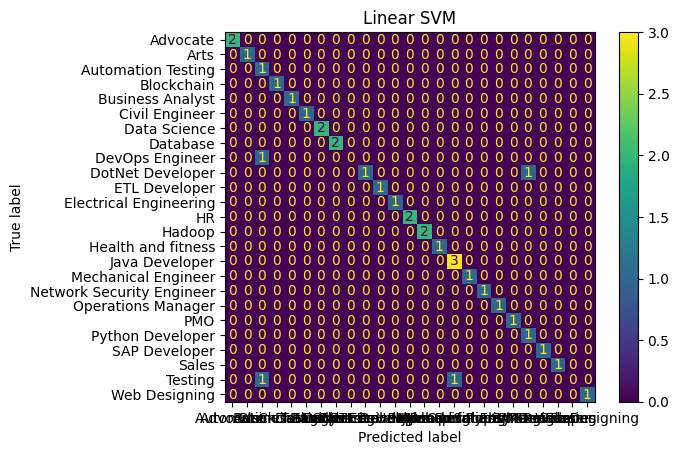

C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: User

Linear SVM CV Scores : [0.79411765 0.79411765 0.88235294 0.88235294 0.81818182]
Linear SVM Mean CV Accuracy : 0.8342245989304813


C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\virat\AppData\Loca

SGD Classifier Test Accuracy : 0.8235294117647058


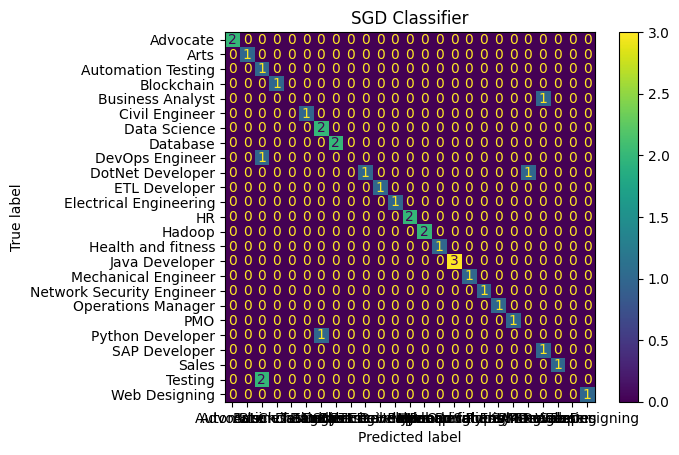

C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: User

SGD Classifier CV Scores : [0.79411765 0.82352941 0.79411765 0.85294118 0.87878788]
SGD Classifier Mean CV Accuracy : 0.828698752228164


C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\virat\AppData\Loca

Random Forest Test Accuracy : 0.6176470588235294


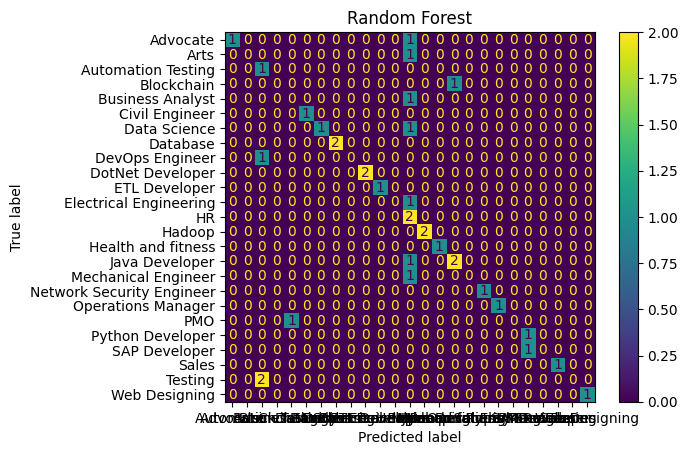

C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: User

Random Forest CV Scores : [0.76470588 0.73529412 0.67647059 0.67647059 0.6969697 ]
Random Forest Mean CV Accuracy : 0.7099821746880572


C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\virat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")


In [11]:
for name,model in models.items():
    pipe=Pipeline([
        ("tfidf",TfidfVectorizer(stop_words="english",max_features=6000,ngram_range=(1,2))),
        ("model",model)
    ])
    pipe.fit(X_train,Y_train)
    Y_pred=pipe.predict(X_test)
    acc=metrics.accuracy_score(Y_test,Y_pred)
    accuracies[name]=acc
    print(name,"Test Accuracy :",acc)
    metrics.ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred)
    plt.title(name)
    plt.show()
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    cv_scores=cross_val_score(pipe,X,Y,cv=cv,scoring="accuracy")
    cv_means[name]=cv_scores.mean()
    print(name,"CV Scores :",cv_scores)
    print(name,"Mean CV Accuracy :",cv_scores.mean())

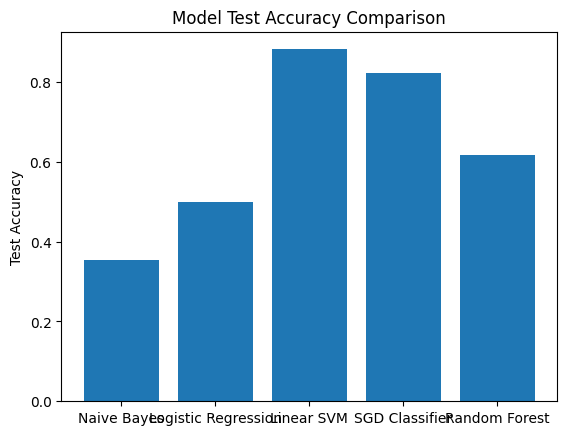

In [12]:
plt.figure()
plt.bar(accuracies.keys(),accuracies.values())
plt.ylabel("Test Accuracy")
plt.title("Model Test Accuracy Comparison")
plt.show()

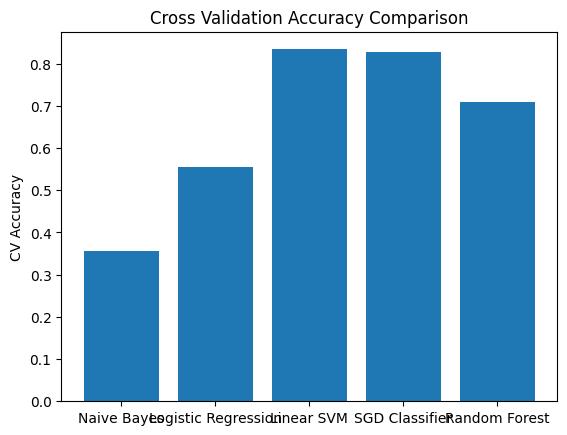

In [13]:
plt.figure()
plt.bar(cv_means.keys(),cv_means.values())
plt.ylabel("CV Accuracy")
plt.title("Cross Validation Accuracy Comparison")
plt.show()